## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [145]:
# import libraries 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [146]:
#read data
df=pd.read_csv("ab_data.csv")

In [147]:
# take a look at the top 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [148]:
# use df.shape to get the size of data set in list[0,1] -> 0 refer to rows and 1 refer to colums
df.shape[0]

294478

c. The number of unique users in the dataset.

In [149]:
# use nunique to return the number  of unique users in the dataset. 
df.user_id.nunique()

290584

d. The proportion of users converted.

In [150]:
# the proportion of users converted = the size of users converted / the total number of the data set
len(df[df.converted == 1]) / len(df)


0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [151]:
len(df[(df.group =='treatment')&(df.landing_page=='old_page')|(df.group =='control')&(df.landing_page=='new_page')])


3893

f. Do any of the rows have missing values?

In [152]:
#check for null values
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [153]:
##we create df which has treatment & new page together and control & old page together
df2 = df[((df.group == 'control')&(df.landing_page=='old_page')) | ((df.group == 'treatment')&(df.landing_page=='new_page'))]

In [154]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [155]:
#number of uniques IDs
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [156]:
##number of duplicated IDs
df2.user_id.duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [157]:
#locate the row of the repeated value to know the repeat user_id
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [158]:
# the information for the repeat user_id?
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [159]:
#drop second duplicated row
df2=df2.drop_duplicates(subset=['user_id'])
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id==773192]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [160]:
#probability of an individual converting regardless of the page they receive
p_population=len(df2[df2.converted==1]) / len(df2)
p_population

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [161]:
p_control=len(df2[(df2.group == 'control')&(df2.converted==1)]) / len(df2[df2.group == 'control'])
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [162]:
p_treatment=len(df2[(df2.group == 'treatment')&(df2.converted==1)]) / len(df2[df2.group == 'treatment'])
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [163]:
p_newpage=len(df2[df2.landing_page == 'new_page']) / len(df2) 
p_newpage

0.5000619442226688

In [164]:
# What is the time interval of our experiment (i.e. was it run long enough)
df2['timestamp'].min(), df2['timestamp'].max() 


('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No there is no sufficient evidence to conclude that the new treatment page leads to more conversions.**

**The probability of the group who took the old page and converted is 12.04%.**

**The probability of the group who took the new page and converted is 11.88%.**

**The probability of old page is higher.**

**Additionally, the test has only be running for 22 days.**

**so there is no evidence to say new page icreases convert rate.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  



`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**

Null Hypothesis: **$p_{new}$** <= **$p_{old}$** 

Alternative Hypothesis: **$p_{new}$** > **$p_{old}$** 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [165]:
#mean of converted
df2.converted.mean()

0.11959708724499628

In [166]:
#As per above, we assume p_new is probability of an individual converting regardless of the page they receive.
#Pnew = Pold = overall conversion rate, 11.96%
P_new= p_population
P_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [167]:
#As per above, we assume p_old is probability of an individual converting regardless of the page they receive.
# This should be equal to p_new
P_old = p_population
P_old

0.11959708724499628

c. What is $n_{new}$?

In [168]:
#number of users for new page
n_new = len(df2[df2.group=='treatment'])
n_new


145310

d. What is $n_{old}$?

In [169]:
#number of users for old page
n_old = len(df2[df2.group=='control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [170]:
# np.random.binomial(n, p, size)
# n=1 trial size, p=probabiity of trial, size=number of trials to run
new_page_converted = np.random.binomial(1, P_new, n_new)
new_page_converted.mean()

0.11874612896565963

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [171]:
old_page_converted = np.random.binomial(1, P_old, n_old)
old_page_converted.mean()

0.11865165136225339

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [172]:
#the diff between two means
obs_simulation_diff = new_page_converted.mean() - old_page_converted.mean()
print('Our observed simulated difference is: {}'.format(obs_simulation_diff.mean()))


Our observed simulated difference is: 9.447760340623723e-05


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [173]:
#create an array to append the diff between the two means converted rate for the two pages
new_converted_simulation = np.random.binomial(n_new, Pnew_null, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, Pold_null, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00032138, -0.00016741, -0.00085543, ...,  0.00170491,
        0.00061743, -0.00088315])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Frequency')

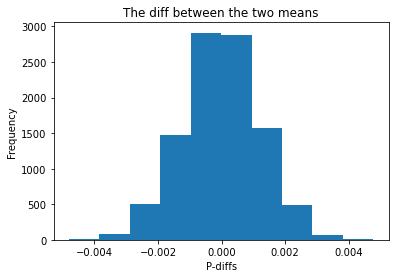

In [174]:
plt.hist(p_diffs);
plt.title('The diff between the two means')
plt.xlabel('P-diffs')
plt.ylabel('Frequency')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [175]:
#the actual probability of converted in control group
control = df2[df2['group'] == 'control']['converted'].mean()
control

0.1203863045004612

In [176]:
#the actual probability of converted in treatment group
treatment = df2[df2['group'] == 'treatment']['converted'].mean()
treatment

0.11880806551510564

In [177]:
#Get obs_diff
obs_diff = treatment - control
obs_diff

-0.0015782389853555567

Text(0, 0.5, 'Frequency')

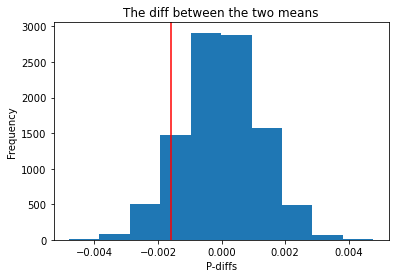

In [178]:
#Plot proportion of the p_diffs are greater than the actual difference observed 
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');
plt.title('The diff between the two means')
plt.xlabel('P-diffs')
plt.ylabel('Frequency')

In [179]:
#finding the P-value
(p_diffs > obs_diff).mean()

0.9026

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**
The proportion of the p_diffs are greater than the actual difference observed is 90.85%


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [180]:
#finding the number of converted individuals in old and new page, and the number of users in the two groups
convert_old =len(df2[(df2.group=='control')&(df2.converted==1)])
convert_new = len(df2[(df2.group=='treatment')&(df2.converted==1)])
n_old = len(df2[df2.group=='control'])
n_new = len(df2[df2.group=='treatment'])
print ("The number of converted individuals in old page" ,convert_old)
print("The number of converted individuals in new page",convert_new)
print("The number of users in the two groups :","old" ,n_old,"new",n_new)

The number of converted individuals in old page 17489
The number of converted individuals in new page 17264
The number of users in the two groups : old 145274 new 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [181]:
#get the p-value and z-score
stat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
stat, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

-They mean that, with 95% confidence interval, p-value = 0.05,Since the p-value is large (~0.9) the new page deos not make better than the old one **So we fail to reject null hypothesis**

-Yes they agree with the findings in parts j. and k.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer.**

Logistic Regression



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [182]:
# Add the intercept column
df2['intercept'] = 1
# Get the dummy columns for the group
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
# Look at the first few rows of our resulting dataframe
df2.head()



,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [183]:
#rename the column
df2.rename(columns={'treatment':'ab_page'},inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [184]:
#create the model
log_model = sm.Logit(df2.converted , df2[['intercept','ab_page']])
#fit the model
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [185]:
#showing the summary
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-03-13 16:38 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**

In **Part II** for hypothesis test , The computation done is one-sided ( tight-tailed )
The logistic regression was tow-tailed test
The p-value for ab_page in regression model is 0.1899 which is defferent from the p-value obtained from hypothesis test which is 0.9050, thats because the different assumption between the two cases , in htpothesis test case we assumed that tha probabilty of converting for the old page and the new page are the same.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

One of the advantages of multiple regression is that it can determine the relative effect of one or more variables. For example, we can look at a person’s age and see if age has an effect on the number of converted individuals and we can notice the gender of the users to see if the gender has an effect on the number of converted individuals so taking other factors into account might be another way of looking at the data and even imply different inferences.
I think one of the disadvantages is the model will be more complex in some cases and adding additional terms also makes interpretation of coefficients difficult.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [186]:
#read the data
countries_df = pd.read_csv('countries.csv')
countries_df.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [187]:
# Join the two datasets and create a new dataframe
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
# Print the first few rows
df_new.head() 


,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [188]:
#check the values of countru column
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [189]:
### Create the necessary dummy variables
df_new[['US','UK', 'CA']]= pd.get_dummies(df_new['country'])[['US', "UK",'CA']]
#drop the unused column
df_new.drop('CA',axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,US,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1


In [195]:
#create the model
logit = sm.Logit(df_new.converted, df_new[['intercept','ab_page','US','UK']])
#fit the model
results = logit.fit()
#show the summary
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-03-13 16:45 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [199]:
# Create interaction variables between page and country
df_new['ab_page_UK'] = df_new['ab_page']*df_new['UK']
df_new['ab_page_US'] = df_new['ab_page']*df_new['US']

In [201]:
# Instantiate the new regression model
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK', 'US', 'ab_page_UK', 'ab_page_US']])

# Fit the model
results = logit_mod.fit()

# Print summary of the results
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-03-13 16:47 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_page_UK     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_page_US     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

Once again, our p-values are still above the 0.05 and we fail to reject the null hypothesis.

## Conclusions


we can say that we can not fail to reject the Null hypothesis, the old page is better than the new page


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.